In [6]:
#Installing Packages and Loading Data
import pandas
import random 
import numpy as np
import seaborn as sns #has to be done b4 matplotlib to run correctly 
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plot we will create

Caricom_Disagg = pandas.read_csv('/Users/tonirobinson/Documents/Caricom_MentalHealth_DataProject/Caricom_MentalHealth_SexDisagg.csv')

Caricom = pandas.read_csv('/Users/tonirobinson/Documents/Caricom_MentalHealth_DataProject/Caricom_MentalHealth1.csv')

Global_Data = pandas.read_csv('/Users/tonirobinson/Documents/Caricom_MentalHealth_DataProject/GlobalMentalHealth.csv')


In [3]:
#Exploring Caricom dataset
Caricom.describe()

,Year,Prevalence_Alcohol,Prevalence_Anxiety,Prevalence_Depression,Prevalence_Drug_Use,Prevalence_Schizophrenia
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2007.000000,1.681620,4.375632,3.639478,0.917728,0.285274
std,7.221426,0.278924,0.167281,0.640811,0.181164,0.014062
min,1995.000000,1.076465,3.898042,2.975901,0.598507,0.245815
25%,2001.000000,1.514470,4.305795,3.146893,0.822318,0.281732
50%,2007.000000,1.622017,4.432054,3.383750,0.910104,0.287305
75%,2013.000000,1.929360,4.483132,3.998391,1.052787,0.296773
max,2019.000000,2.241948,4.739055,5.218622,1.223575,0.302710


In [9]:
#Exploring Caricom_Disagg Dataset
Caricom_Disagg.describe()

,Year,Prevalence_Female_Disorders,Prevalence_Male_Disorders,Population__historical_estimates_,Unnamed: 5,Unnamed: 6
count,299.00000,299.000000,299.000000,2.990000e+02,0.0,0.0
mean,2006.00000,13.687192,13.412208,1.238609e+06,NaN,NaN
std,6.64437,0.493321,0.348318,2.468869e+06,NaN,NaN
min,1995.00000,13.249023,12.907614,6.867200e+04,NaN,NaN
25%,2000.00000,13.360990,13.137132,1.083040e+05,NaN,NaN
50%,2006.00000,13.461596,13.365444,2.857980e+05,NaN,NaN
75%,2012.00000,13.743786,13.478002,7.600410e+05,NaN,NaN
max,2017.00000,14.926929,14.210842,1.098237e+07,NaN,NaN


In [10]:
#Exploring Global Dataset
Global_Data.describe()

,Year,Prevalence_Alcohol,Prevalence_Anxiety,Prevalence_Depression,Prevalence_Drug_Use,Prevalence_Schizophrenia
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2007.000000,1.541417,4.114183,3.994106,0.808971,0.291583
std,7.247431,0.368296,0.757413,0.518984,0.516222,0.050928
min,1995.000000,1.071063,3.147588,3.273543,0.383683,0.218336
25%,2001.000000,1.243556,3.592312,3.652058,0.428435,0.263402
50%,2007.000000,1.409374,3.891439,3.948206,0.595429,0.293892
75%,2013.000000,1.835069,4.480956,4.273504,0.946087,0.323667
max,2019.000000,2.151465,5.452686,4.816778,1.900669,0.364155


In [12]:
#Check for any missing data in Caricom column
for col in Caricom.columns:
    pct_missing = np.mean(Caricom[col].isnull())
    print(' {} - {}%'.format(col, round(pct_missing*100)))

 Country - 0%
 Year - 0%
 Prevalence_Alcohol - 0%
 Prevalence_Anxiety - 0%
 Prevalence_Depression - 0%
 Prevalence_Drug_Use - 0%
 Prevalence_Schizophrenia - 0%


In [13]:
#Check for missing data in Caricom_disagg
for col in Caricom_Disagg.columns:
    pct_missing = np.mean(Caricom_Disagg[col].isnull())
    print(' {} - {}%'.format(col, round(pct_missing*100)))
#The columns that we are interested in are not missing any columns

 Country - 0%
 Year - 0%
 Prevalence_Female_Disorders - 0%
 Prevalence_Male_Disorders - 0%
 Population__historical_estimates_ - 0%
 Unnamed: 5 - 100%
 Unnamed: 6 - 100%


In [15]:
#Check for missing data in Global_Data 
for col in Global_Data.columns:
    pct_missing = np.mean(Global_Data[col].isnull())
    print(' {} - {}%'.format(col, round(pct_missing*100)))

 WB Region - 0%
 Year - 0%
 Prevalence_Alcohol - 0%
 Prevalence_Anxiety - 0%
 Prevalence_Depression - 0%
 Prevalence_Drug_Use - 0%
 Prevalence_Schizophrenia - 0%


In [23]:
#Checking for any outliers 
Caricom['Prevalence_Depression'].describe()
Caricom['Prevalence_Anxiety'].describe()
Caricom['Prevalence_Alcohol'].describe()
Caricom['Prevalence_Drug_Use'].describe()
Caricom['Prevalence_Schizophrenia'].describe() #No noticeable outliers

count    350.000000
mean       0.285274
std        0.014062
min        0.245815
25%        0.281732
50%        0.287305
75%        0.296773
max        0.302710
Name: Prevalence_Schizophrenia, dtype: float64

In [25]:
#Further checking for outliers
Caricom_Disagg['Prevalence_Female_Disorders'].describe()
Caricom_Disagg['Prevalence_Male_Disorders'].describe() #There are 51 less counts than in the Caricom data

count    299.000000
mean      13.412208
std        0.348318
min       12.907614
25%       13.137132
50%       13.365444
75%       13.478002
max       14.210842
Name: Prevalence_Male_Disorders, dtype: float64

In [30]:
#More Checking for Outliers
Global_Data['Prevalence_Depression'].describe()
Global_Data['Prevalence_Anxiety'].describe()
Global_Data['Prevalence_Alcohol'].describe()
Global_Data['Prevalence_Drug_Use'].describe()
Global_Data['Prevalence_Schizophrenia'].describe() #All appears in order here

count    100.000000
mean       0.291583
std        0.050928
min        0.218336
25%        0.263402
50%        0.293892
75%        0.323667
max        0.364155
Name: Prevalence_Schizophrenia, dtype: float64

In [31]:
#Checking Non-numeric columns
Caricom['Country'].value_counts()

Antigua and Barbuda                 25
Bahamas                             25
Barbados                            25
Belize                              25
Dominica                            25
Grenada                             25
Guyana                              25
Haiti                               25
Jamaica                             25
Saint Kitts and Nevis               25
Saint Lucia                         25
Saint Vincent and the Grenadines    25
Suriname                            25
Trinidad and Tobago                 25
Name: Country, dtype: int64

In [32]:
Caricom_Disagg['Country'].value_counts() #There are two less instances for each than the general Caricom table 

Antigua and Barbuda                 23
Bahamas                             23
Barbados                            23
Belize                              23
Dominica                            23
Grenada                             23
Guyana                              23
Haiti                               23
Jamaica                             23
Saint Lucia                         23
Saint Vincent and the Grenadines    23
Suriname                            23
Trinidad and Tobago                 23
Name: Country, dtype: int64

In [34]:
Global_Data['WB Region'].value_counts()

World Bank High Income            25
World Bank Low Income             25
World Bank Lower Middle Income    25
World Bank Upper Middle Income    25
Name: WB Region, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

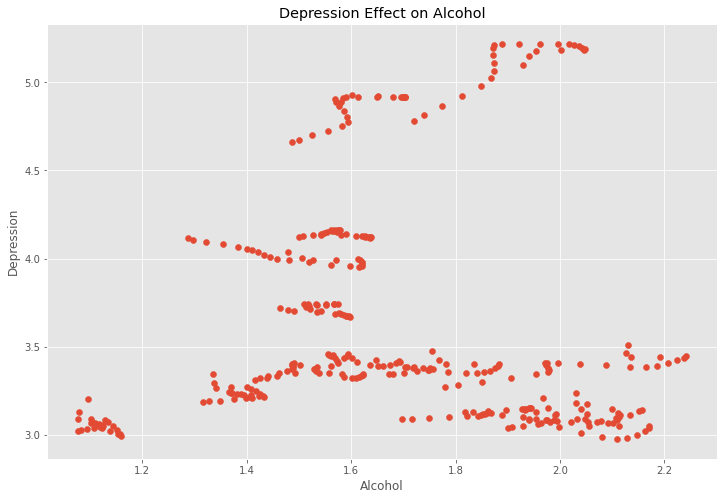

In [58]:
#Checking correlation between Alcohol & Depression in Caricom

plt.scatter(x=Caricom['Prevalence_Alcohol'], y=Caricom['Prevalence_Depression'])
plt.title('Depression Effect on Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Depression')
plt.show

<AxesSubplot:xlabel='Prevalence_Alcohol', ylabel='Prevalence_Depression'>

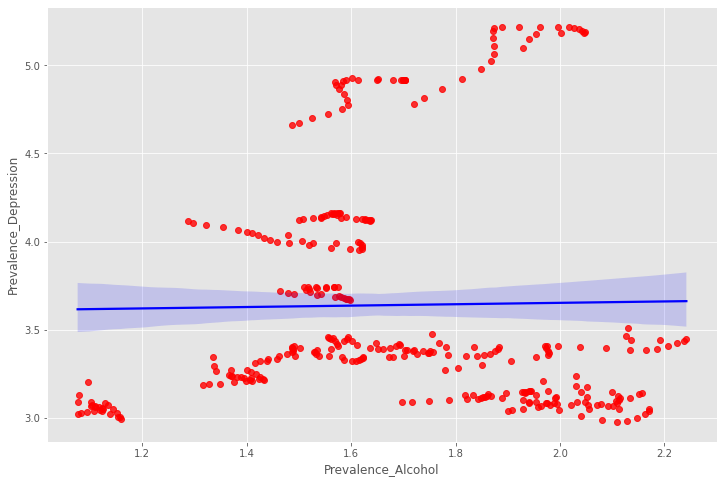

In [62]:
# Plot Depression Effect on Alcohol Using Seaborn

sns.regplot(x='Prevalence_Alcohol', y='Prevalence_Depression', data=Caricom, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

#There is no correlation between Alcohol usage and Depression 

In [66]:
#Checking correlation between the columns

Caricom.corr(method='pearson')

#We can see that Anxiety and Alcohol Use has a positive correlation but let's visualize it first

,Year,Prevalence_Alcohol,Prevalence_Anxiety,Prevalence_Depression,Prevalence_Drug_Use,Prevalence_Schizophrenia
Year,1.000000,0.197588,0.280827,0.029171,-0.010533,0.135493
Prevalence_Alcohol,0.197588,1.000000,0.467888,0.017242,-0.072099,0.069959
Prevalence_Anxiety,0.280827,0.467888,1.000000,-0.097482,-0.031438,-0.211393
Prevalence_Depression,0.029171,0.017242,-0.097482,1.000000,-0.670894,-0.361122
Prevalence_Drug_Use,-0.010533,-0.072099,-0.031438,-0.670894,1.000000,0.556149
Prevalence_Schizophrenia,0.135493,0.069959,-0.211393,-0.361122,0.556149,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

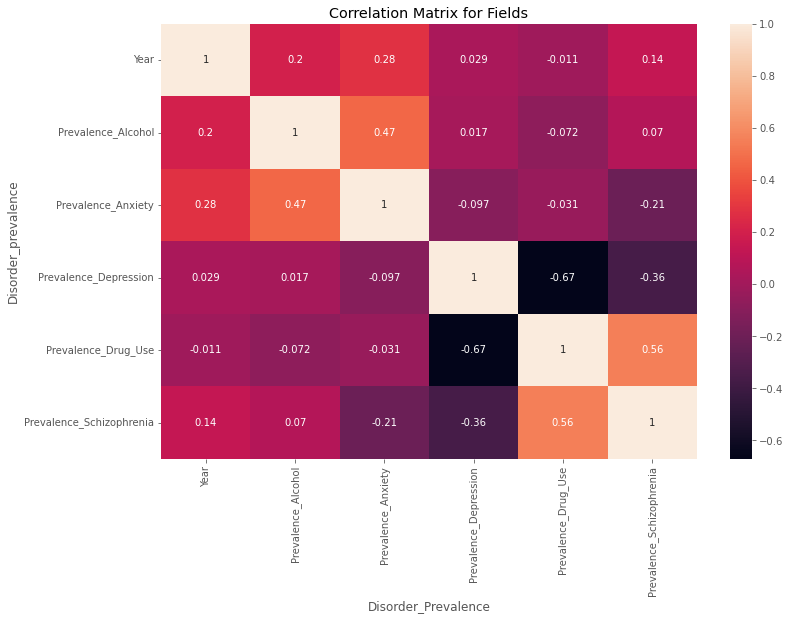

In [68]:
correlation_matrix = Caricom.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Fields')
plt.xlabel('Disorder_Prevalence')
plt.ylabel('Disorder_prevalence')
plt.show

<AxesSubplot:xlabel='Prevalence_Drug_Use', ylabel='Prevalence_Schizophrenia'>

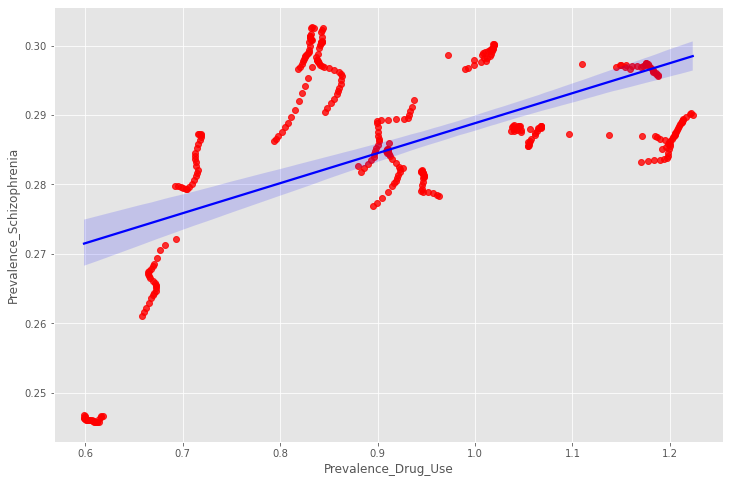

In [69]:
#We also notice that there is a strong positive correlation between Drug Use & Schizophrenia
# and a very strong negative relationship between Drug Use and Depression as well
#Using another scatterplot to get a better look at the positive relationship 

sns.regplot(x='Prevalence_Drug_Use', y='Prevalence_Schizophrenia', data=Caricom, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [73]:
#Setting Country as the Index that the DataFrame will be based on, in the future, this can go at the top of the script. 
Caricom_2 = pandas.read_csv(
 '/Users/tonirobinson/Documents/Caricom_MentalHealth_DataProject/Caricom_MentalHealth1.csv',
  nrows=350,
  index_col= ['Country', 'Prevalence_Alcohol', 'Prevalence_Anxiety', 'Prevalence_Depression', 'Prevalence_Drug_Use', 'Prevalence_Schizophrenia']
)

In [74]:
Caricom_2.head()

Year
Country             Prevalence_Alcohol Prevalence_Anxiety Prevalence_Depression Prevalence_Drug_Use Prevalence_Schizophrenia      
Antigua and Barbuda 1.901041           4.432703           3.038734              0.818684            0.296627                  1995
                    1.908258           4.439360           3.044155              0.820000            0.296931                  1996
                    1.929948           4.448310           3.052463              0.821913            0.297330                  1997
                    1.957269           4.457936           3.062661              0.823006            0.297755                  1998
                    1.981544           4.466207           3.072566              0.824193            0.298122                  1999

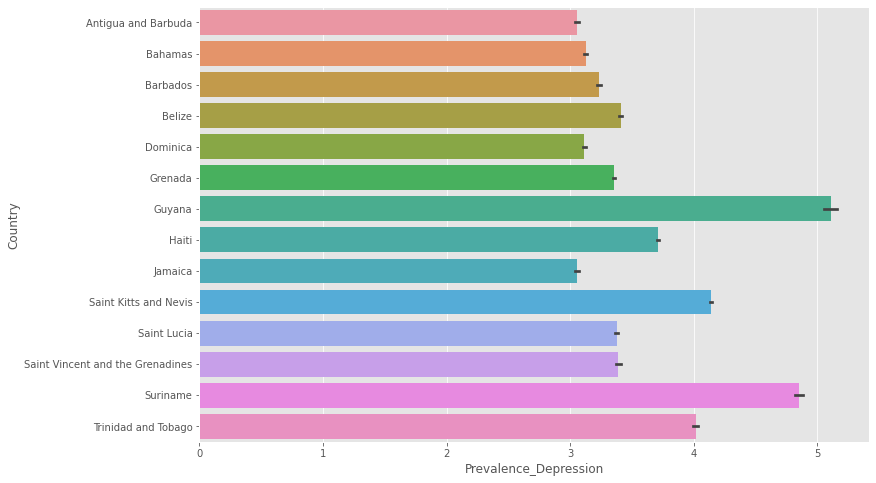

In [33]:
#Attempting to make a bar chart to show Alcohol prevalence by country

sns.barplot(x='Prevalence_Depression', y='Country', data=Caricom)
plt.show()

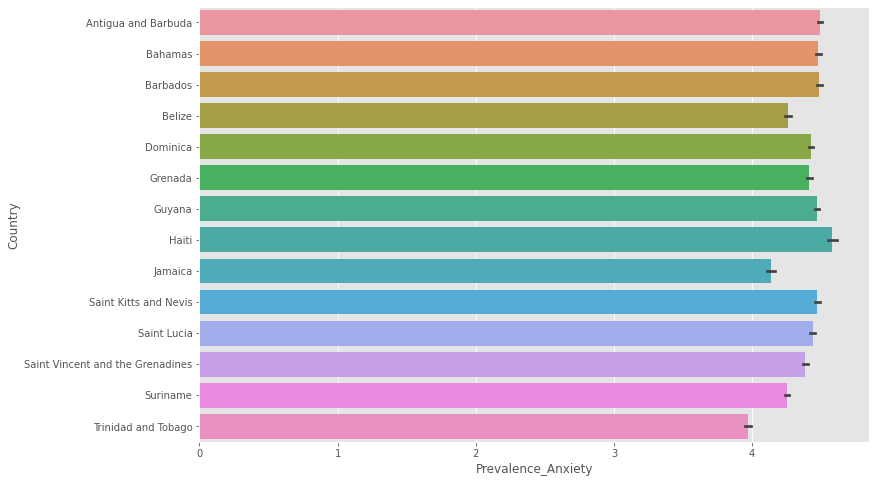

In [92]:
#Showing Anxiety Prevalence by Country 

sns.barplot(x='Prevalence_Anxiety', y='Country', data=Caricom)
plt.show()

In [19]:
#Then see the correlation between Anxiety,Depression, Schizophrenia & Alcohol & Drug Use then that rounds out the first part of the project.

#Let us try to test R^2 to determine the % of variation explained by the two variables. 

#First define x & y variables
x = Caricom['Prevalence_Drug_Use']
y = Caricom['Prevalence_Schizophrenia']

R_square = r2_score(x,y)
print(R_square)
#The number below doesn't make sense so I will square the 0.56 in the heatmap above

R_square_fixed = 0.56**2
print(R_square_fixed)
#So we see that only 31% of the variation is explained by the relationship between the two, not very significant. 

-12.142125434100096
0.31360000000000005


<AxesSubplot:xlabel='Prevalence_Anxiety', ylabel='Prevalence_Alcohol'>

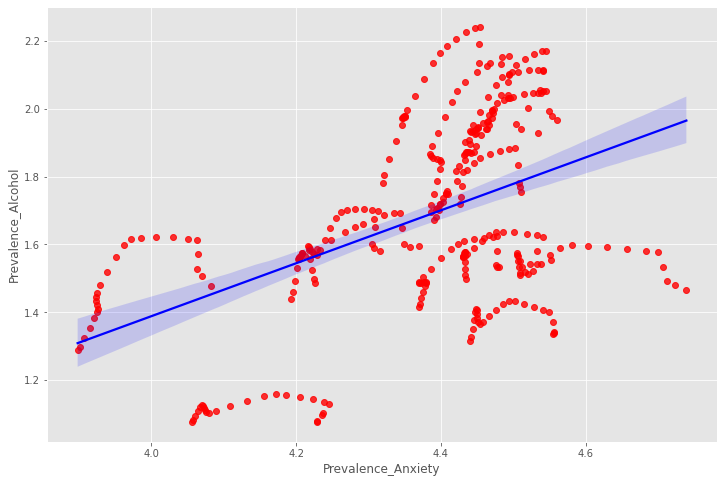

In [20]:
#A noticeable positive relationship was seen between Anxiety & Alcohol in Caricom.

sns.regplot(x='Prevalence_Anxiety', y='Prevalence_Alcohol', data=Caricom, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
#The dots are more clustered around the line so we can determine that the relationship is moderate

In [21]:
#Now to determine the Coefficient of Determination 
Rsquared_Anxiety = 0.47**2
print(Rsquared_Anxiety)

#We see that only 22% of the variation is explained by the relationship, so not very strong

0.22089999999999999


<AxesSubplot:xlabel='Prevalence_Depression', ylabel='Prevalence_Drug_Use'>

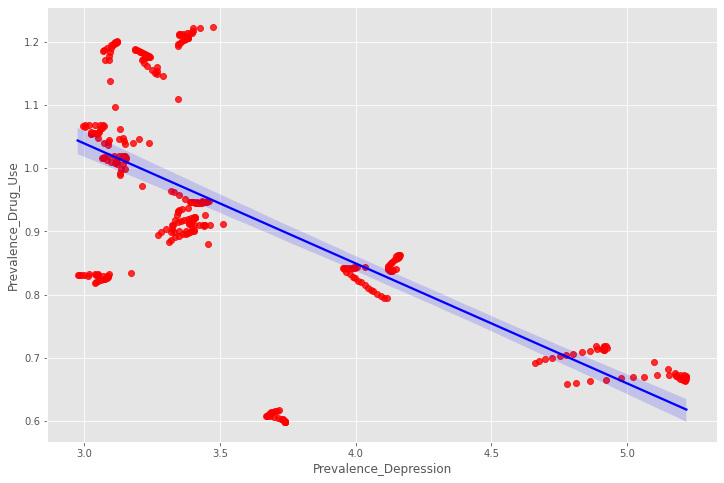

In [23]:
#Let's explore the strong negative relationship between Depression & Drug Use

sns.regplot(x='Prevalence_Depression', y='Prevalence_Drug_Use', data=Caricom, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [24]:
#This trend has interesting implications for drugs being used to informally treat depressive symptoms
#Now to calculate the Coefficent of Determination
Rsquared_DepDrug = -.67**2
print(Rsquared_DepDrug)

-0.4489000000000001


In [ ]:
#Not sure if the negative is as a result of inputting the negative figure


<function matplotlib.pyplot.show(close=None, block=None)>

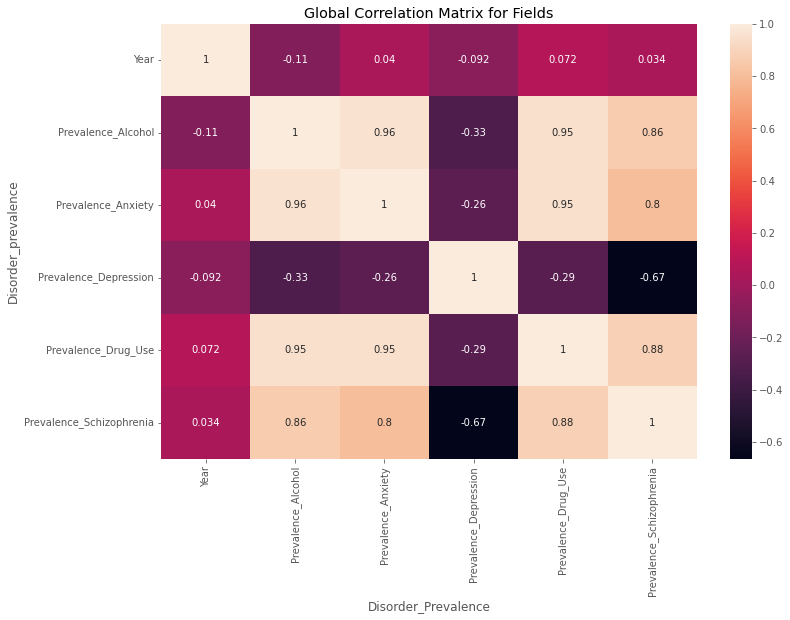

In [26]:
#How does all this data relate to Global numbers. Let's use a heatmap to see visible trends

correlation_matrix = Global_Data.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Global Correlation Matrix for Fields')
plt.xlabel('Disorder_Prevalence')
plt.ylabel('Disorder_prevalence')
plt.show

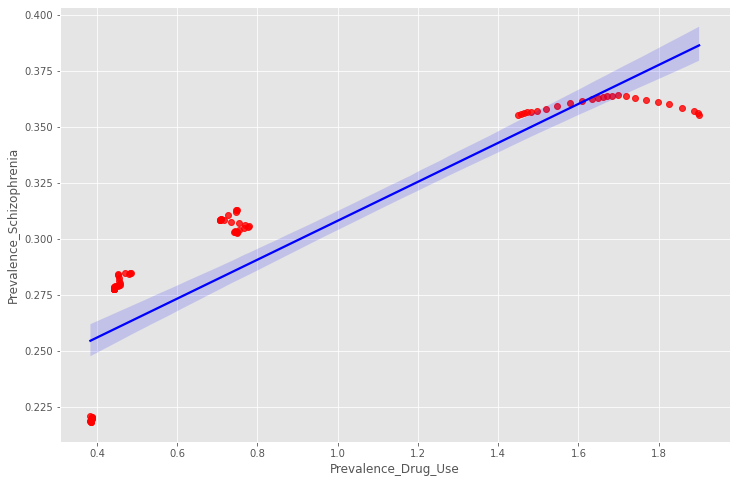

In [27]:
#Lots of strong correlations seen but for parity, we will investigate the same as Caricom

sns.regplot(x='Prevalence_Drug_Use', y='Prevalence_Schizophrenia', data=Global_Data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [28]:
#The data points are for the most part clustered around the line which reinforces the strong relationship 
#Now to see the co-efficient of determination 

Rsquared_Global_DrugSchiz = 0.88**2
print(Rsquared_Global_DrugSchiz)
#This shows that 77% of the variation can be explained by the relationship

0.7744


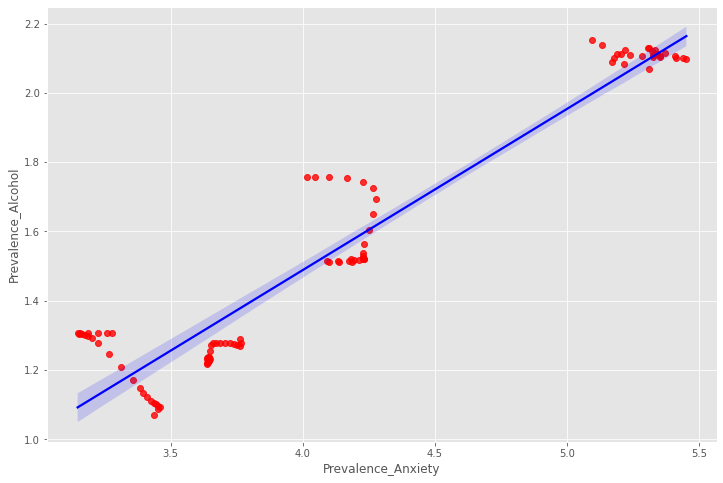

In [29]:
#Exploring Global Anxiety & Alcohol Relationship 

sns.regplot(x='Prevalence_Anxiety', y='Prevalence_Alcohol', data=Global_Data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()
#Again the relationship strength is reinforced based on the clustering around the line 

In [30]:
#The Coefficent of Determination 

Rsquared_Global_AnxAlch = 0.96**2
print(Rsquared_Global_AnxAlch)

#This shows that 92% of the variation can be explained by the relationship

0.9216


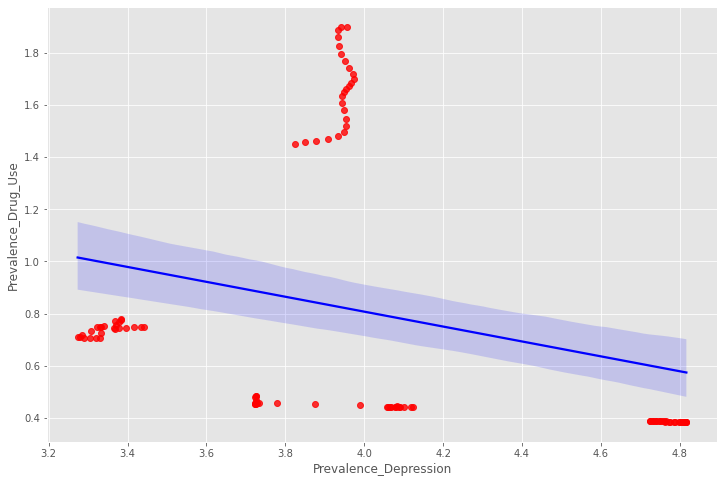

In [31]:
#Depression & Drug Use
sns.regplot(x='Prevalence_Depression', y='Prevalence_Drug_Use', data=Global_Data, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

#A weak relationship between the two, especially as the points are not clustered along the line

In [32]:
#Coefficient of Determination 

Rsquared_Global_DepDrug = 0.29**2
print(Rsquared_Global_DepDrug)

#Only 8% of the variation can be explained by the relationship

0.0841


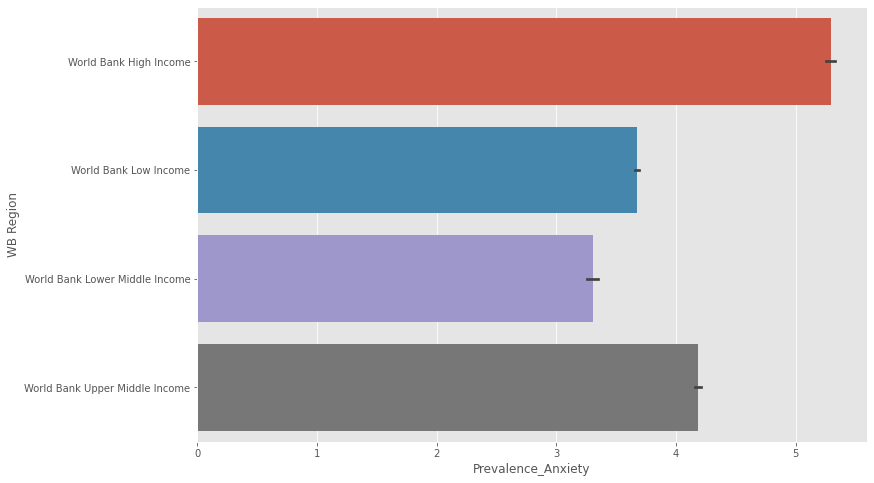

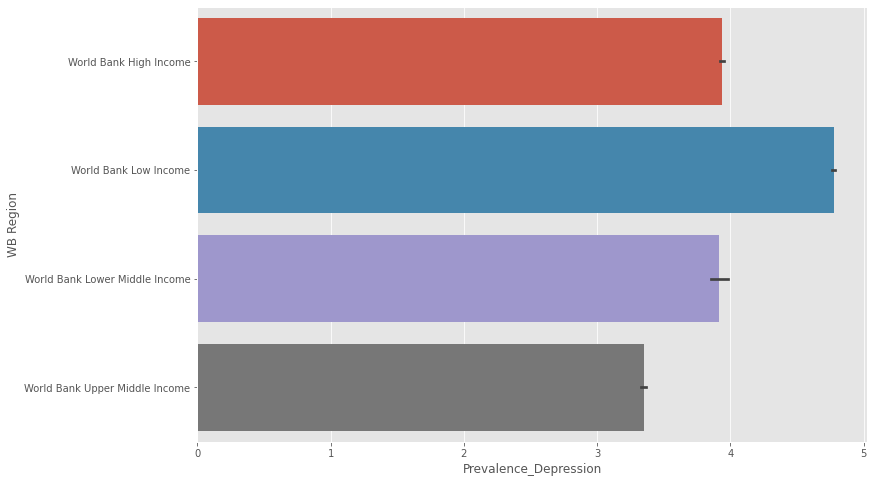

In [36]:
#To Round off the Global Analysis, let's look at a horizontal chart showing the Prevalence of Anxiety & Depression Globally 

sns.barplot(x='Prevalence_Anxiety', y='WB Region', data=Global_Data)
plt.show()

sns.barplot(x='Prevalence_Depression', y='WB Region', data=Global_Data)
plt.show()

In [ ]:
#Majority of Caricom nations fall between Lower & Upper MI countries and for the most are on par with Global stats
#The issue, however, lies in the fact that it seems that there is not enough data gathered for Caricom. 